In [4]:
import math
import pandas as pd
from matplotlib import pyplot as plt

dfi [1, 1, 1, 1, 1, 2, 1, 3, 1, 2, 1, 1, 2, 1, 3, 1]
idfi: [0.47712125471966244, 0.47712125471966244, 0.47712125471966244, 0.47712125471966244, 0.47712125471966244, 0.17609125905568124, 0.47712125471966244, 0.0, 0.47712125471966244, 0.17609125905568124, 0.47712125471966244, 0.47712125471966244, 0.17609125905568124, 0.47712125471966244, 0.0, 0.47712125471966244]
documents weight: [[0.0, 0.47712125471966244, 0.47712125471966244, 0.47712125471966244, 0.0, 0.17609125905568124, 0.0, 0.0, 0.0, 0.17609125905568124, 0.0, 0.47712125471966244, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.17609125905568124, 0.0, 0.0, 0.17609125905568124, 0.47712125471966244, 0.0, 0.47712125471966244], [0.47712125471966244, 0.0, 0.0, 0.0, 0.47712125471966244, 0.17609125905568124, 0.47712125471966244, 0.0, 0.47712125471966244, 0.0, 0.47712125471966244, 0.0, 0.17609125905568124, 0.0, 0.0, 0.0]]
documents magnitude: [0.9862023270367446, 0.7192396307505309, 1.095554526967031]
documents dot-prod

<BarContainer object of 3 artists>

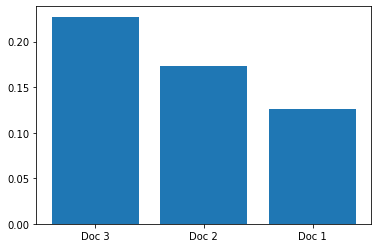

In [5]:

document_split=lambda document_list: [x.split() for x in document_list]   

frequency= lambda terms , doc_list : [doc_list.count(x) for x in terms ]

find_frequency = lambda terms , doc_list : [ frequency(terms,x) for x in doc_list]

def idfi(dfi,D):
  l=[]
  for x in dfi:
    if(x==0):
      l.append(0)
    else:
      l.append(math.log(D/x,10))
  return l

def dfi(docs):
  l=[]
  for x in range(len(docs[0])):
    sum=0
    for y in range(len(docs)):
      if(docs[y][x]>0):
        sum=sum+1
    l.append(sum)
  print("dfi",l)
  return idfi(l,len(docs))

def dot_product(lis1,lis2):
  s=0
  for x in range(len(lis1)):
    s=s +lis1[x]*lis2[x]
  return s

weight=lambda doc_f,idfi: [doc_f[x]*idfi[x] for x in range(len(doc_f))]   #formula: term frequency of documment * Inverse document frequency

magnitude=lambda lis:math.sqrt(sum(list(map(lambda x:x**2,lis))))         #formula : Square_root(x1^2 + x2^2 ...)

cosine=lambda dot,query,doc: dot/(query*doc)                              #formula : (dot_product(query.docment)) / magnitude(Query) * magnitude(Document)

def ranks(idfi,docs_f,q_f):                                               #takes idfi,  term frequency of doumnents and term frequency of query and return ranks
  query_weight=weight(q_f,idfi)
  query_magnitude=magnitude(query_weight)
  docs_weight=[weight(x,idfi) for x in docs_f ]
  print('documents weight:',docs_weight)
  docs_magnitude=[magnitude(x) for x in docs_weight]
  print('documents magnitude:',docs_magnitude)
  docs_dotproduct=[dot_product(query_weight,x) for x in docs_weight]
  print('documents dot-product:',docs_dotproduct)
  docs_cosine=[cosine(docs_dotproduct[x],query_magnitude,docs_magnitude[x] ) for x in range(len(docs_dotproduct))]
  docs_cosine={ f"Doc {x+1}":docs_cosine[x] for x in range(len(docs_cosine))}
  print("documents cosine:",docs_cosine)
  r={k: v for k, v in sorted(docs_cosine.items(), key=lambda item: item[1],reverse=True )}
  return r

def cosine_ranking_algo(query,docs):                                      #takes Query and List of Documents as input and return ranks in dictionary sorted by ranks
  query=query.lower() 
  terms=" ".join(docs) + query
  terms=terms.lower()
  terms=terms.split()
  terms=list(dict.fromkeys(terms))  
  terms.sort()
  query=query.split()
  docs=document_split(docs)
  docs_f=find_frequency(terms,docs)
  q_f=frequency(terms,query)
  idfi= dfi(docs_f)
  print("idfi:",idfi)
  return ranks(idfi,docs_f,q_f)

query="stock exchange pakistan "
docs=["market of stock exchange is affected by brokers ",
      'pakistan stock market is very popular ',
      "stock exchange pakistan is in loss now a days "]

d=cosine_ranking_algo(query,docs) 
plt.bar(d.keys(),d.values())

